In [2]:
import csv

In [3]:
import numpy as np


In [4]:
percent_missed = []

percent_cont = []
percent_wrong=[]
percent_correct = []


In [5]:
lidaracc1 = 'accuracy_hybrid_august_21_dist.csv' # 2,3,4,6

lidaracc2 ='accur_dist_reeval_July2021.csv' # 2,3,4,6

lidaracc3 = 'accur_KF_0.1velocity.csv' # 2,3,4,6

lidaracc4 = 'accuracy_hybrid_july_28_ang.csv' # 2,3,4,6

lidaracc5 = 'accuracy_only_0.1_freq_map.csv' # change 6 to 5 in t : 2,3,4,5

lidaracc6 = 'adaptive_grid_accuracy.csv' # change to 1,2,3,4

In [ ]:
# hybrid distance, distance based, KF based, hybrid angle, hybrid only 0.1 map, adaptive grid 

In [44]:
irow

2

In [32]:
lidaracc= lidaracc6

irow=0
firstrow=0
pmissed_current =[]
pcont_current =[]
pwrong_current =[]
pright_current =[]

missed_total = []
cont_total =[]
wrong_total =[]
right_total =[]
tot_total =[]

with open(lidaracc) as lidar_csv_file:
    csv_reader = csv.reader(lidar_csv_file, delimiter=",")
    for row in csv_reader:
        irow = irow+1
        if firstrow==0:
            firstrow=1
            continue
        m = float(row[1]) # 2, 1
        c = float(row[2]) # 3, 2
        w = float(row[3]) # 4, 3
        t = float(row[4]) # 6, 4
        #print(" m is ", m)
        #print("c is ", c)
        #print("w is ", w)
        #print("t is ", t)
        missed_total.append(m)
        cont_total.append(c)
        wrong_total.append(w)
        tot_total.append(t)
        right_total.append(t-m-c-w)
        #ce = float(row[6])
        """pm = m/t
        pc = c/t
        pw = w/t
        pr = (t-m -c-w)/t
        #pce = ce/t
        pmissed_current.append(pm)
        pcont_current.append(pc)
        pwrong_current.append(pw)
        pright_current.append(pr)
        
        if irow==10:
            break"""
        

In [33]:
curr_total = np.sum(tot_total)

In [34]:
curr_total

3801.0

In [20]:
#totals = []

In [37]:
totals

[3187.0, 3249.0, 2994.0, 3071.0, 2830.0, 3801.0]

In [42]:
3187/3801

0.8384635622204683

In [36]:
totals.append(curr_total)

In [54]:
pm = np.sum(missed_total)/curr_total
pw = np.sum(wrong_total)/curr_total
pc = np.sum(cont_total)/curr_total

pr = 1 - pm - pw - pc

# add to 

percent_missed.append(pm)
percent_cont.append(pc)
percent_wrong.append(pw)
percent_correct.append(pr)


In [55]:
percent_cont

[0.013806087229369313,
 0.06371191135734072,
 0.06613226452905811,
 0.006186909801367633,
 0.00035335689045936394,
 0.007103393843725336]

In [78]:
percent_correct

[0.9463445246313147,
 0.8944290550938749,
 0.8774215096860387,
 0.9498534679257571,
 0.9402826855123675,
 0.9828992370428834]

In [87]:
percent_wrong

[0.05365547536868531,
 0.10557094490612506,
 0.12257849031396129,
 0.05014653207424291,
 0.05971731448763251,
 0.0171007629571166]

In [79]:
percent_wrong=[]

In [80]:
for val in percent_correct:
    w_val = 1 -val
    percent_wrong.append(w_val)

In [ ]:
# nov 26 total # comparisons <-> traj len



In [61]:
# simple bar plot 

bar0 = [100*percent_missed[0], 100*percent_cont[0], 100*percent_wrong[0]]

bar1 = [100*percent_missed[1], 100*percent_cont[1], 100*percent_wrong[1] ]

bar2 = [100*percent_missed[2], 100*percent_cont[2], 100*percent_wrong[2] ]

bar3 = [100*percent_missed[3], 100*percent_cont[3], 100*percent_wrong[3] ]

bar4 = [100*percent_missed[4], 100*percent_cont[4], 100*percent_wrong[4] ]

bar5 = [100*percent_missed[5], 100*percent_cont[5], 100*percent_wrong[5] ]



In [58]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x141fcaa45e0>,
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

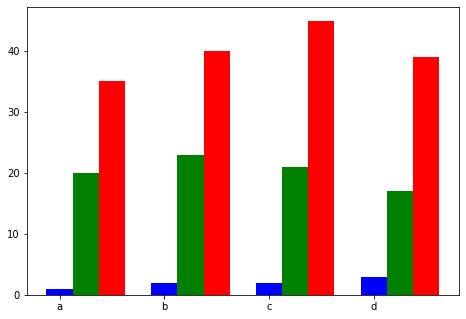

In [66]:
import numpy as np
import matplotlib.pyplot as plt
data = [[1, 2, 2, 3],
[20, 23, 21, 17],
[35, 40, 45, 39]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.xticks( X, ['a', 'b', 'c', 'd'])

In [70]:
from matplotlib.pyplot import figure

In [74]:
len(bar1)

3

In [82]:
bar1

[0.06155740227762388, 6.3711911357340725, 4.124345952600801]

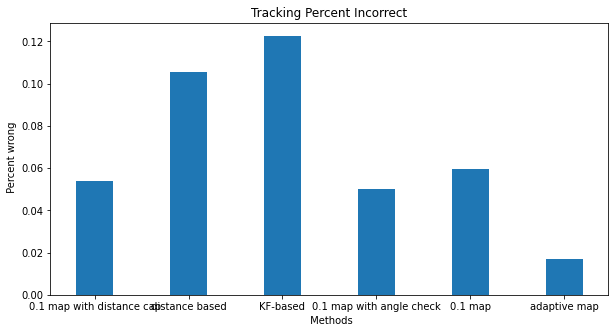

In [88]:
import numpy as np
import matplotlib.pyplot as plt
 

data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}

#methods = ['distance based', 'KF-based', '0.1 map with angle check', '0.1 map', 'adaptive map', '0.1 map with distance cap']
methods = ['0.1 map with distance cap', 'distance based', 'KF-based', '0.1 map with angle check', '0.1 map', 'adaptive map']

courses = list(methods)

values = list(percent_wrong)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, width = 0.4)
 
plt.xlabel(" Methods")
plt.ylabel(" Percent wrong")
plt.title("Tracking Percent Incorrect")
plt.show()

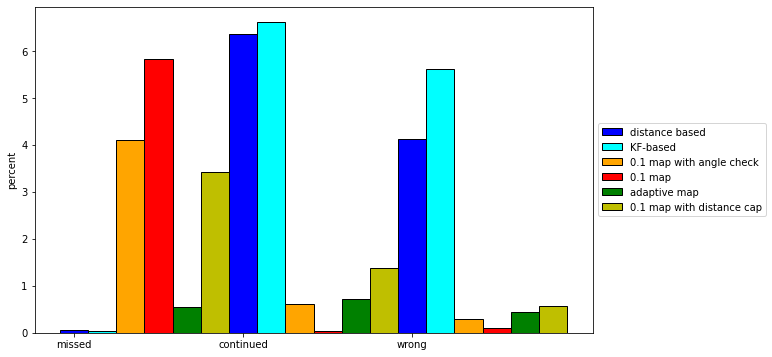

In [86]:
# Create blue bars

barWidth = 0.16667

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x+ 2*barWidth for x in r1]

r4 = [x+ 3*barWidth for x in r1]
r5 = [x+ 4*barWidth for x in r1]
r6 = [x+ 5*barWidth for x in r1]


#plt.figure(figsize)

plt.figure(figsize = (10, 6))

plt.bar(r1, bar1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='distance based')
 
# Create cyan bars
plt.bar(r2, bar2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='KF-based')
 
plt.bar(r3, bar3, width= barWidth, color = 'orange', edgecolor='black', capsize=7, label='0.1 map with angle check')

plt.bar(r4, bar4, width=barWidth, color='r', edgecolor='black', label='0.1 map')

plt.bar(r5, bar5, width=barWidth, color='g', edgecolor='black', label='adaptive map')

plt.bar(r6, bar0, width=barWidth, color='y', edgecolor='black', label='0.1 map with distance cap')



# general layout
#plt.xticks([r + barWidth for r in range(len(bar1))], ['wrong', 'continued', 'missed', 'clustering error'])

plt.xticks( r1, ['missed', 'continued', 'wrong'])
plt.ylabel('percent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )

# Put a legend to the right of the current axis

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

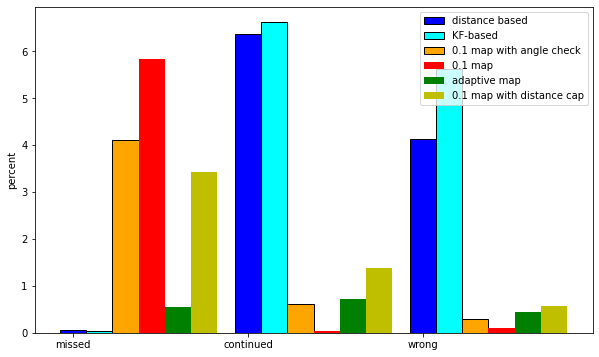

In [77]:
# Create blue bars

barWidth = .15 # multiply by 6

r1 = np.arange(3)

r2 = [x + barWidth for x in r1]
r3 = [x+ 2*barWidth for x in r1]

r4 = [x+ 3*barWidth for x in r1]
r5 = [x+ 4*barWidth for x in r1]
r6 = [x+ 5*barWidth for x in r1]


#plt.figure(figsize)

plt.figure(figsize = (10, 6))

plt.bar(r1, bar1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='distance based')
 
# Create cyan bars
plt.bar(r2, bar2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='KF-based')
 
plt.bar(r3, bar3, width= barWidth, color = 'orange', edgecolor='black', capsize=7, label='0.1 map with angle check')

plt.bar(r4, bar4, width=barWidth, color='r', label='0.1 map')

plt.bar(r5, bar5, width=barWidth, color='g', label='adaptive map')

plt.bar(r6, bar0, width=barWidth, color='y', label='0.1 map with distance cap')



# general layout
#plt.xticks([r + barWidth for r in range(len(bar1))], ['wrong', 'continued', 'missed', 'clustering error'])

plt.xticks( r1, ['missed', 'continued', 'wrong'])
plt.ylabel('percent')
plt.legend()

plt.show()

In [ ]:
#create another column or another bar plot for total errors

# 3  bars for each error type 


In [ ]:
# https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/

import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
barWidth2 =0.6
 
# Choose the height of the blue bars
bars1 = [100*pwrongmean, 100*pcontmean, 100*pmissedmean, 100*pcerrormean]
 
# Choose the height of the cyan bars
bars2 = [100*pwrongmean_dist, 100*pcontmean_dist, 100*pmissedmean_dist, 100*pcerrormean_dist]

bars3 = [100*pwrongmean_kf, 100*pcontmean_kf, 100*pmissedmean_kf, 100*pcerrormean_kf]

# Choose the height of the error bars (bars1)
yer1 = [50*statistics.stdev(pwrong), 50*statistics.stdev(pcont), 50*statistics.stdev(pmissed), 50*statistics.stdev(pcerror)]  
 
# Choose the height of the error bars (bars2)
yer2 = [50*statistics.stdev(pwrong_dist), 50*statistics.stdev(pcont_dist), 50*statistics.stdev(pmissed_dist), 50*statistics.stdev(pcerror_dist)]  

yer3 = [50*statistics.stdev(pwrong_kf), 50*statistics.stdev(pcont_kf), 50*statistics.stdev(pmissed_kf), 50*statistics.stdev(pcerror_kf)]  


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x+ barWidth2 for x in r1]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='frequency grid based')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='distance-based')
 
plt.bar(r3, bars3, width= barWidth, color = 'orange', edgecolor='black', yerr=yer3, capsize=7, label='KF-based')


# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['wrong', 'continued', 'missed', 'clustering error'])
plt.ylabel('percent')
plt.legend()

plt.show()


MOTA (Multiple Object Tracking Accuracy) 

MOTA = 1 - ( sum_t (FN_t + FP_t + IDS_t ) )/(sum_t GT_t )

FN: false negative (missed) , FP: false positive (cont), IDS: ID mismatch (wrong) 
GT: ground truth object count

In [ ]:
# for the cont , stop 

# for the missed, continue checking until end of correct trajectory

# for wrong, continue checking until end of correct trajectory


In [ ]:
# MOTA scores calculation

# consider the rest of them as correct <=> take the total ground truth as max ground truth count



In [ ]:
# measure the total lengths of trajectories found based on the total ground truth # 

